In [1]:
EPTA_dir='EPTA_J1713/'
EINPTA_dir='EPTA+INPTA_J1713/'

In [2]:
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension


2023-03-13 17:11:39.549459: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-13 17:11:39.923395: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-13 17:11:39.926736: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 17:11:40.966402: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
epta_1=np.loadtxt(EPTA_dir+'chain_1.txt')
par_epta=np.loadtxt(EPTA_dir+'pars.txt',dtype=str)
len_epta=len(par_epta)
epta_2=epta_1.T

In [4]:
einpta_1=np.loadtxt(EINPTA_dir+'chain_1.txt')
par_einpta=np.loadtxt(EINPTA_dir+'pars.txt',dtype=str)
len_einpta=len(par_einpta)
einpta_2=einpta_1.T

In [5]:
names = ['logA','gamma']
labels=['\log A','\gamma']
del_names=['delta_logA','delta_gamma']

In [13]:
epta_arr=[epta_2[len(par_epta)-1],epta_2[len(par_epta)-2]]

In [14]:
einpta_arr=[einpta_2[len(par_einpta)-1],einpta_2[len(par_einpta)-2]]

In [15]:
epta=MCSamples(samples=np.array(epta_arr).transpose(),loglikes=epta_2[-3],names=names,labels=labels,label='EPTA')
einpta=MCSamples(samples=np.array(einpta_arr).transpose(),loglikes=einpta_2[-3],names = names,labels=labels,label='EPTA+INPTA')

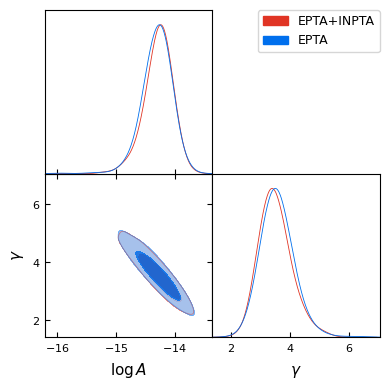

In [16]:
g = plots.get_subplot_plotter()
g.triangle_plot([einpta,epta], filled=True)

In [17]:
from diff_chain import Diff_chain_kde_parameter_shift_2D_fft

In [18]:
def plot_diff_chain(A1,A2,lims=None,off_size=None):
    diff_chain, shift_probability, shift_lower, shift_upper=Diff_chain_kde_parameter_shift_2D_fft(A1,A2,off_size)
    nsig=utilities.from_confidence_to_sigma(shift_probability)
    # plot the contour for a sanity check:
    g = plots.get_single_plotter()
    diff_chain.updateSettings({'contours': [shift_probability,0.68, 0.95]})
    g.settings.num_plot_contours = 3
    g.plot_2d(diff_chain,param1=del_names[0], param2=del_names[1], solid_colors='r',filled=True,lims=lims)
    g.add_legend([ A1.getLabel()+' & '+A2.getLabel()+ 
                  '\n\n $\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True);
    g.add_x_marker(0)
    g.add_y_marker(0)
    plt.savefig(A1.getLabel()+'_'+A2.getLabel()+'.png',dpi=300)
    
    return diff_chain,shift_probability
    

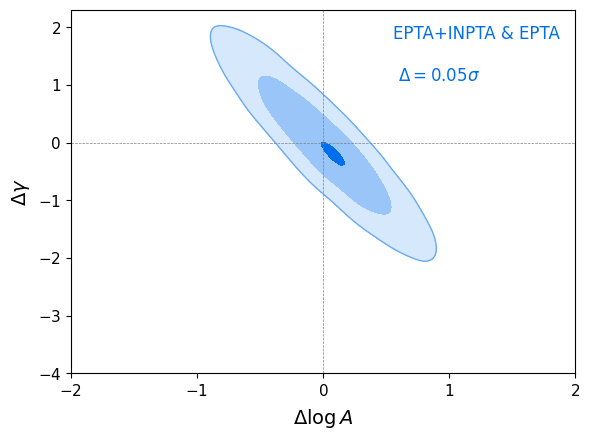

In [23]:
diff_chain,shift_probability=plot_diff_chain(einpta,epta,lims=[-2,2,-4,2.3])